In [1]:
import pandas as pd 
import os 
import warnings
warnings.filterwarnings('ignore')

In [3]:
os.getcwd()

'/Users/adityadhanotia/Desktop/Fall 2023 classes/quant trading /code files and datasets/QQQ'

In [39]:
#read training data 
train = pd.read_feather('X_train_features.feather', columns=None, use_threads=True)
train.head()

,index,Macro_CPIAUCSL,Macro_GDP,Macro_INDPRO,Macro_MICH,Macro_PCEPI,Macro_UMCSENT,Macro_UNRATE,Equities_LQD_CLOSE_lag1d_1_period_ret,Equities_SPY_CLOSE_lag1d_1_period_ret,...,avg_pairwise_corr_IV,ret_1d_lag1d,abs_ret_lag1d,ret_squared_1d_lag1d,rv_22d_lag1d,rv_MA_5d_lag1d,rv_MA_10d_lag1d,rv_MA_22d_lag1d,rv_MA_40d_lag1d,rv_MA_60d_lag1d
0,2005-05-24,193.5,12297.5,107.101,3.2,110.852,86.9,5.1,0.004184,0.005541,...,0.396452,0.005045,0.005045,2.545203e-05,0.001321,0.000066,0.000058,0.000060,0.000099,0.000086
1,2005-05-25,193.5,12297.5,107.101,3.2,110.852,86.9,5.1,0.002174,-0.002338,...,0.381348,0.003170,0.003170,1.004890e-05,0.001110,0.000061,0.000054,0.000050,0.000098,0.000084
2,2005-05-26,193.5,12297.5,107.101,3.2,110.852,86.9,5.1,-0.000090,-0.000753,...,0.360396,-0.004214,0.004214,1.775780e-05,0.001062,0.000028,0.000053,0.000048,0.000090,0.000082
3,2005-05-27,193.5,12297.5,107.101,3.2,110.852,86.9,5.1,0.000633,0.005360,...,0.341388,0.010050,0.010050,1.010025e-04,0.001078,0.000034,0.000062,0.000049,0.000092,0.000084
4,2005-05-31,193.5,12297.5,107.101,3.2,110.852,86.9,5.1,-0.000090,0.001666,...,0.319284,0.000524,0.000524,2.745760e-07,0.001077,0.000031,0.000051,0.000049,0.000089,0.000083


In [42]:
#set date as index and drop teh index column 
train['Date'] = pd.to_datetime(train['index'])
train.set_index('Date', inplace=True)
train.drop(columns=['index'], inplace=True)
train


,Macro_CPIAUCSL,Macro_GDP,Macro_INDPRO,Macro_MICH,Macro_PCEPI,Macro_UMCSENT,Macro_UNRATE,Equities_LQD_CLOSE_lag1d_1_period_ret,Equities_SPY_CLOSE_lag1d_1_period_ret,Equities_XLY_CLOSE_lag1d_1_period_ret,...,avg_pairwise_corr_IV,ret_1d_lag1d,abs_ret_lag1d,ret_squared_1d_lag1d,rv_22d_lag1d,rv_MA_5d_lag1d,rv_MA_10d_lag1d,rv_MA_22d_lag1d,rv_MA_40d_lag1d,rv_MA_60d_lag1d
Date,,,,,,,,,,,,,,,,,,,,,
2005-05-24,193.50,12297.5,107.1010,3.2,110.852,86.9,5.1,0.004184,0.005541,0.006389,...,0.396452,0.005045,0.005045,2.545203e-05,0.001321,0.000066,0.000058,0.000060,0.000099,0.000086
2005-05-25,193.50,12297.5,107.1010,3.2,110.852,86.9,5.1,0.002174,-0.002338,-0.001814,...,0.381348,0.003170,0.003170,1.004890e-05,0.001110,0.000061,0.000054,0.000050,0.000098,0.000084
2005-05-26,193.50,12297.5,107.1010,3.2,110.852,86.9,5.1,-0.000090,-0.000753,-0.003028,...,0.360396,-0.004214,0.004214,1.775780e-05,0.001062,0.000028,0.000053,0.000048,0.000090,0.000082
2005-05-27,193.50,12297.5,107.1010,3.2,110.852,86.9,5.1,0.000633,0.005360,0.005164,...,0.341388,0.010050,0.010050,1.010025e-04,0.001078,0.000034,0.000062,0.000049,0.000092,0.000084
2005-05-31,193.50,12297.5,107.1010,3.2,110.852,86.9,5.1,-0.000090,0.001666,0.000000,...,0.319284,0.000524,0.000524,2.745760e-07,0.001077,0.000031,0.000051,0.000049,0.000089,0.000083
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2008-11-13,213.06,14420.5,106.1173,2.9,122.479,55.3,6.7,-0.000221,-0.044001,-0.060773,...,0.867912,-0.046179,0.046179,2.132500e-03,0.040949,0.001042,0.000985,0.001861,0.001909,0.001390
2008-11-14,213.06,14420.5,106.1173,2.9,122.479,55.3,6.7,-0.006848,0.062340,0.078075,...,0.867638,0.060954,0.060954,3.715390e-03,0.042792,0.001386,0.001246,0.001945,0.001973,0.001452
2008-11-17,213.06,14420.5,106.1173,2.9,122.479,55.3,6.7,-0.000222,-0.049907,-0.048611,...,0.867686,-0.048588,0.048588,2.360794e-03,0.037133,0.001773,0.001481,0.001688,0.002006,0.001491


In [50]:
# assign all columns in train dataframe to x variable which will be our predictors 
x_train = train
x_train

,Macro_CPIAUCSL,Macro_GDP,Macro_INDPRO,Macro_MICH,Macro_PCEPI,Macro_UMCSENT,Macro_UNRATE,Equities_LQD_CLOSE_lag1d_1_period_ret,Equities_SPY_CLOSE_lag1d_1_period_ret,Equities_XLY_CLOSE_lag1d_1_period_ret,...,avg_pairwise_corr_IV,ret_1d_lag1d,abs_ret_lag1d,ret_squared_1d_lag1d,rv_22d_lag1d,rv_MA_5d_lag1d,rv_MA_10d_lag1d,rv_MA_22d_lag1d,rv_MA_40d_lag1d,rv_MA_60d_lag1d
Date,,,,,,,,,,,,,,,,,,,,,
2005-05-24,193.50,12297.5,107.1010,3.2,110.852,86.9,5.1,0.004184,0.005541,0.006389,...,0.396452,0.005045,0.005045,2.545203e-05,0.001321,0.000066,0.000058,0.000060,0.000099,0.000086
2005-05-25,193.50,12297.5,107.1010,3.2,110.852,86.9,5.1,0.002174,-0.002338,-0.001814,...,0.381348,0.003170,0.003170,1.004890e-05,0.001110,0.000061,0.000054,0.000050,0.000098,0.000084
2005-05-26,193.50,12297.5,107.1010,3.2,110.852,86.9,5.1,-0.000090,-0.000753,-0.003028,...,0.360396,-0.004214,0.004214,1.775780e-05,0.001062,0.000028,0.000053,0.000048,0.000090,0.000082
2005-05-27,193.50,12297.5,107.1010,3.2,110.852,86.9,5.1,0.000633,0.005360,0.005164,...,0.341388,0.010050,0.010050,1.010025e-04,0.001078,0.000034,0.000062,0.000049,0.000092,0.000084
2005-05-31,193.50,12297.5,107.1010,3.2,110.852,86.9,5.1,-0.000090,0.001666,0.000000,...,0.319284,0.000524,0.000524,2.745760e-07,0.001077,0.000031,0.000051,0.000049,0.000089,0.000083
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2008-11-13,213.06,14420.5,106.1173,2.9,122.479,55.3,6.7,-0.000221,-0.044001,-0.060773,...,0.867912,-0.046179,0.046179,2.132500e-03,0.040949,0.001042,0.000985,0.001861,0.001909,0.001390
2008-11-14,213.06,14420.5,106.1173,2.9,122.479,55.3,6.7,-0.006848,0.062340,0.078075,...,0.867638,0.060954,0.060954,3.715390e-03,0.042792,0.001386,0.001246,0.001945,0.001973,0.001452
2008-11-17,213.06,14420.5,106.1173,2.9,122.479,55.3,6.7,-0.000222,-0.049907,-0.048611,...,0.867686,-0.048588,0.048588,2.360794e-03,0.037133,0.001773,0.001481,0.001688,0.002006,0.001491


In [44]:
#read the Y variable 
data = pd.read_csv("QQQ_86755_regression_variables_minus_macroecon.csv", parse_dates=[0])
data.rename(columns={'Unnamed: 0':'Date'}, inplace=True)
data.set_index('Date', inplace=True)
data


,CP_FF_Spread,3m_CLOSE_TED_Spread,3m_Euribor_OIS_Spread,3m_JPY_Libor_OIS_Spread,3m_USD_Libor_OIS_Spread,US_Swap_Spread_2Y,EUR_USD_Spread,USD_JPY_Spread,BofA_US_IG_Corp_OAS,BofA_US_HY_Corp_OAS,...,ret_1d,abs_ret,ret_squared_1d,rv_22d,rv_22d_lead(22+1)d,rv_MA_5d,rv_MA_10d,rv_MA_22d,rv_MA_40d,rv_MA_60d
Date,,,,,,,,,,,,,,,,,,,,,
2005-01-03,0.15,64.20,0.0640,NaN,NaN,37.05,NaN,NaN,NaN,NaN,...,-0.010422,0.010422,1.086181e-04,0.001035,0.002196,0.000041,0.000042,0.000047,0.000062,0.000079
2005-01-04,0.23,58.90,0.1010,NaN,0.10600,36.05,NaN,NaN,NaN,NaN,...,-0.018203,0.018203,3.313492e-04,0.001352,0.002162,0.000089,0.000071,0.000061,0.000069,0.000079
2005-01-05,0.25,62.00,0.0640,NaN,0.12400,35.80,NaN,NaN,NaN,NaN,...,-0.006189,0.006189,3.830372e-05,0.001388,0.002140,0.000096,0.000060,0.000063,0.000070,0.000079
2005-01-06,0.23,61.50,0.0800,NaN,0.12000,38.40,NaN,NaN,NaN,NaN,...,-0.005008,0.005008,2.508006e-05,0.001401,0.002390,0.000101,0.000062,0.000064,0.000070,0.000080
2005-01-07,0.23,61.50,0.0660,NaN,0.11800,37.25,NaN,NaN,NaN,NaN,...,0.005294,0.005294,2.802644e-05,0.001135,0.002391,0.000106,0.000065,0.000052,0.000071,0.000080
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-12-27,NaN,29.39,-0.0901,NaN,NaN,21.52,-0.584,0.160,63.0,302.0,...,0.016527,0.016527,2.731417e-04,0.005621,0.005601,0.000215,0.000259,0.000255,0.000167,0.000142
2021-12-28,NaN,28.63,-0.0930,NaN,NaN,16.91,-0.572,0.154,62.0,301.0,...,-0.004635,0.004635,2.148323e-05,0.005632,0.006624,0.000200,0.000241,0.000256,0.000167,0.000142
2021-12-29,NaN,30.40,-0.0745,-0.02317,0.13675,17.72,-0.573,0.133,61.0,303.0,...,-0.000149,0.000149,2.220100e-08,0.005272,0.006661,0.000100,0.000230,0.000240,0.000167,0.000134


In [45]:
y = data[['rv_22d_lead(22+1)d']]
y

,rv_22d_lead(22+1)d
Date,
2005-01-03,0.002196
2005-01-04,0.002162
2005-01-05,0.002140
2005-01-06,0.002390
2005-01-07,0.002391
...,...
2021-12-27,0.005601
2021-12-28,0.006624
2021-12-29,0.006661


In [53]:
#join the y variable to the x_train dataframe on the index
c_data = x_train.join(y, how='inner') #combined data
c_data

,Macro_CPIAUCSL,Macro_GDP,Macro_INDPRO,Macro_MICH,Macro_PCEPI,Macro_UMCSENT,Macro_UNRATE,Equities_LQD_CLOSE_lag1d_1_period_ret,Equities_SPY_CLOSE_lag1d_1_period_ret,Equities_XLY_CLOSE_lag1d_1_period_ret,...,ret_1d_lag1d,abs_ret_lag1d,ret_squared_1d_lag1d,rv_22d_lag1d,rv_MA_5d_lag1d,rv_MA_10d_lag1d,rv_MA_22d_lag1d,rv_MA_40d_lag1d,rv_MA_60d_lag1d,rv_22d_lead(22+1)d
2005-05-24,193.50,12297.5,107.1010,3.2,110.852,86.9,5.1,0.004184,0.005541,0.006389,...,0.005045,0.005045,2.545203e-05,0.001321,0.000066,0.000058,0.000060,0.000099,0.000086,0.001018
2005-05-25,193.50,12297.5,107.1010,3.2,110.852,86.9,5.1,0.002174,-0.002338,-0.001814,...,0.003170,0.003170,1.004890e-05,0.001110,0.000061,0.000054,0.000050,0.000098,0.000084,0.001008
2005-05-26,193.50,12297.5,107.1010,3.2,110.852,86.9,5.1,-0.000090,-0.000753,-0.003028,...,-0.004214,0.004214,1.775780e-05,0.001062,0.000028,0.000053,0.000048,0.000090,0.000082,0.001013
2005-05-27,193.50,12297.5,107.1010,3.2,110.852,86.9,5.1,0.000633,0.005360,0.005164,...,0.010050,0.010050,1.010025e-04,0.001078,0.000034,0.000062,0.000049,0.000092,0.000084,0.001061
2005-05-31,193.50,12297.5,107.1010,3.2,110.852,86.9,5.1,-0.000090,0.001666,0.000000,...,0.000524,0.000524,2.745760e-07,0.001077,0.000031,0.000051,0.000049,0.000089,0.000083,0.000988
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2008-11-13,213.06,14420.5,106.1173,2.9,122.479,55.3,6.7,-0.000221,-0.044001,-0.060773,...,-0.046179,0.046179,2.132500e-03,0.040949,0.001042,0.000985,0.001861,0.001909,0.001390,0.028493
2008-11-14,213.06,14420.5,106.1173,2.9,122.479,55.3,6.7,-0.006848,0.062340,0.078075,...,0.060954,0.060954,3.715390e-03,0.042792,0.001386,0.001246,0.001945,0.001973,0.001452,0.028358
2008-11-17,213.06,14420.5,106.1173,2.9,122.479,55.3,6.7,-0.000222,-0.049907,-0.048611,...,-0.048588,0.048588,2.360794e-03,0.037133,0.001773,0.001481,0.001688,0.002006,0.001491,0.028424
2008-11-18,213.06,14420.5,106.1173,2.9,122.479,55.3,6.7,0.007230,-0.013276,-0.028676,...,-0.021049,0.021049,4.430604e-04,0.034633,0.001825,0.001525,0.001574,0.001961,0.001496,0.026171


In [59]:
#select the last 30 variables to do exploratory data analysis on
c_data = c_data.iloc[:, -31:]
c_data



,IV_USDCHF_1M_CLOSE_lag1d_100_period_std_dev_volatility,IV_AUDUSD_1M_CLOSE_lag1d_100_period_std_dev_volatility,IV_2Y_Swaps_3M_CLOSE_lag1d_100_period_std_dev_volatility,IV_2Y_Swaps_6M_CLOSE_lag1d_100_period_std_dev_volatility,IV_5Y_Swaps_3M_CLOSE_lag1d_100_period_std_dev_volatility,IV_5Y_Swaps_6M_CLOSE_lag1d_100_period_std_dev_volatility,IV_10Y_Swaps_3M_CLOSE_lag1d_100_period_std_dev_volatility,IV_10Y_Swaps_6M_CLOSE_lag1d_100_period_std_dev_volatility,IV_30Y_Swaps_3M_CLOSE_lag1d_100_period_std_dev_volatility,IV_30Y_Swaps_6M_CLOSE_lag1d_100_period_std_dev_volatility,...,ret_1d_lag1d,abs_ret_lag1d,ret_squared_1d_lag1d,rv_22d_lag1d,rv_MA_5d_lag1d,rv_MA_10d_lag1d,rv_MA_22d_lag1d,rv_MA_40d_lag1d,rv_MA_60d_lag1d,rv_22d_lead(22+1)d
2005-05-24,8.731028,18.518324,65.502763,59.042748,37.774183,38.563072,26.907602,20.994142,33.440324,21.749967,...,0.005045,0.005045,2.545203e-05,0.001321,0.000066,0.000058,0.000060,0.000099,0.000086,0.001018
2005-05-25,8.036943,17.978972,63.399486,57.535381,35.577619,36.916986,26.128002,20.193295,33.445766,21.628858,...,0.003170,0.003170,1.004890e-05,0.001110,0.000061,0.000054,0.000050,0.000098,0.000084,0.001008
2005-05-26,7.660082,17.543091,61.762648,56.313509,34.014547,35.654746,25.752843,19.720037,33.425084,21.489843,...,-0.004214,0.004214,1.775780e-05,0.001062,0.000028,0.000053,0.000048,0.000090,0.000082,0.001013
2005-05-27,7.071680,17.125690,58.793511,54.673519,31.611613,33.584380,25.398725,19.241149,33.459359,21.384423,...,0.010050,0.010050,1.010025e-04,0.001078,0.000034,0.000062,0.000049,0.000092,0.000084,0.001061
2005-05-31,6.778855,17.073527,58.031822,53.629599,31.584930,32.308953,25.698999,19.051946,33.493556,21.278196,...,0.000524,0.000524,2.745760e-07,0.001077,0.000031,0.000051,0.000049,0.000089,0.000083,0.000988
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2008-11-13,97.620994,512.585678,1702.633021,1128.950435,745.655498,522.200907,444.220457,339.858149,540.455720,404.122020,...,-0.046179,0.046179,2.132500e-03,0.040949,0.001042,0.000985,0.001861,0.001909,0.001390,0.028493
2008-11-14,97.837016,519.179876,1722.637078,1146.251796,751.247890,527.681116,450.044952,345.497260,551.000031,412.389522,...,0.060954,0.060954,3.715390e-03,0.042792,0.001386,0.001246,0.001945,0.001973,0.001452,0.028358
2008-11-17,97.893484,524.109957,1750.591571,1179.984052,761.204987,540.174003,458.863092,356.442541,564.418731,426.935845,...,-0.048588,0.048588,2.360794e-03,0.037133,0.001773,0.001481,0.001688,0.002006,0.001491,0.028424
2008-11-18,97.851490,530.931712,1785.281334,1218.423983,774.546375,555.671853,469.270469,368.576177,579.504196,442.567806,...,-0.021049,0.021049,4.430604e-04,0.034633,0.001825,0.001525,0.001574,0.001961,0.001496,0.026171


In [60]:
# now perform exploratory data analysis

#check for missing values
c_data.isnull().sum()

IV_USDCHF_1M_CLOSE_lag1d_100_period_std_dev_volatility       0
IV_AUDUSD_1M_CLOSE_lag1d_100_period_std_dev_volatility       0
IV_2Y_Swaps_3M_CLOSE_lag1d_100_period_std_dev_volatility     0
IV_2Y_Swaps_6M_CLOSE_lag1d_100_period_std_dev_volatility     0
IV_5Y_Swaps_3M_CLOSE_lag1d_100_period_std_dev_volatility     0
IV_5Y_Swaps_6M_CLOSE_lag1d_100_period_std_dev_volatility     0
IV_10Y_Swaps_3M_CLOSE_lag1d_100_period_std_dev_volatility    0
IV_10Y_Swaps_6M_CLOSE_lag1d_100_period_std_dev_volatility    0
IV_30Y_Swaps_3M_CLOSE_lag1d_100_period_std_dev_volatility    0
IV_30Y_Swaps_6M_CLOSE_lag1d_100_period_std_dev_volatility    0
IV_EURUSD_2M_CLOSE_lag1d_100_period_std_dev_volatility       0
IV_EURUSD_3M_CLOSE_lag1d_100_period_std_dev_volatility       0
IV_USDJPY_2M_CLOSE_lag1d_100_period_std_dev_volatility       0
IV_USDJPY_3M_CLOSE_lag1d_100_period_std_dev_volatility       0
IV_GBPUSD_2M_CLOSE_lag1d_100_period_std_dev_volatility       0
IV_GBPUSD_3M_CLOSE_lag1d_100_period_std_dev_volatility 

In [4]:
old = pd.read_feather('/Users/adityadhanotia/Downloads/X_train_features.feather')
old.tail(10)

,index,Macro_CPIAUCSL,Macro_GDP,Macro_INDPRO,Macro_MICH,Macro_PCEPI,Macro_UMCSENT,Macro_UNRATE,Equities_LQD_CLOSE_lag1d_1_period_ret,Equities_SPY_CLOSE_lag1d_1_period_ret,...,avg_pairwise_corr_IV,ret_1d_lag1d,abs_ret_lag1d,ret_squared_1d_lag1d,rv_22d_lag1d,rv_MA_5d_lag1d,rv_MA_10d_lag1d,rv_MA_22d_lag1d,rv_MA_40d_lag1d,rv_MA_60d_lag1d
871,2008-11-06,213.06,14420.5,106.1173,2.9,122.479,55.3,6.7,0.019428,-0.042028,...,0.868560,-0.052148,0.052148,0.002719,0.055380,0.000928,0.001868,0.002517,0.001881,0.001311
872,2008-11-07,213.06,14420.5,106.1173,2.9,122.479,55.3,6.7,0.006853,-0.055411,...,0.867736,-0.044701,0.044701,0.001998,0.053360,0.001105,0.002066,0.002425,0.001922,0.001344
873,2008-11-10,213.06,14420.5,106.1173,2.9,122.479,55.3,6.7,-0.007027,0.033018,...,0.868175,0.020615,0.020615,0.000425,0.053721,0.001190,0.002005,0.002442,0.001932,0.001349
874,2008-11-11,213.06,14420.5,106.1173,2.9,122.479,55.3,6.7,0.000443,-0.013105,...,0.869243,-0.013466,0.013466,0.000181,0.053181,0.001225,0.001946,0.002417,0.001913,0.001352
875,2008-11-12,213.06,14420.5,106.1173,2.9,122.479,55.3,6.7,0.003213,-0.030876,...,0.869093,-0.021774,0.021774,0.000474,0.053615,0.001160,0.000773,0.002437,0.001923,0.001357
876,2008-11-13,213.06,14420.5,106.1173,2.9,122.479,55.3,6.7,-0.000221,-0.044001,...,0.867912,-0.046179,0.046179,0.002133,0.040949,0.001042,0.000985,0.001861,0.001909,0.001390
877,2008-11-14,213.06,14420.5,106.1173,2.9,122.479,55.3,6.7,-0.006848,0.062340,...,0.867638,0.060954,0.060954,0.003715,0.042792,0.001386,0.001246,0.001945,0.001973,0.001452
878,2008-11-17,213.06,14420.5,106.1173,2.9,122.479,55.3,6.7,-0.000222,-0.049907,...,0.867686,-0.048588,0.048588,0.002361,0.037133,0.001773,0.001481,0.001688,0.002006,0.001491
879,2008-11-18,213.06,14420.5,106.1173,2.9,122.479,55.3,6.7,0.007230,-0.013276,...,0.868594,-0.021049,0.021049,0.000443,0.034633,0.001825,0.001525,0.001574,0.001961,0.001496
880,2008-11-19,213.06,14420.5,106.1173,2.9,122.479,55.3,6.7,0.001215,0.018837,...,0.868905,-0.001057,0.001057,0.000001,0.034632,0.001731,0.001445,0.001574,0.001960,0.001488


In [6]:
new = pd.read_feather('/Users/adityadhanotia/Downloads/X_train_features (1).feather')
new.tail(10)

,index,Macro_CPIAUCSL,Macro_GDP,Macro_INDPRO,Macro_MICH,Macro_PCEPI,Macro_UMCSENT,Macro_UNRATE,Equities_LQD_CLOSE_lag1d_1_period_ret,Equities_SPY_CLOSE_lag1d_1_period_ret,...,avg_pairwise_corr_IV,ret_1d_lag1d,abs_ret_lag1d,ret_squared_1d_lag1d,rv_22d_lag1d,rv_MA_5d_lag1d,rv_MA_10d_lag1d,rv_MA_22d_lag1d,rv_MA_40d_lag1d,rv_MA_60d_lag1d
871,2008-11-07,213.06,14412.8,106.1173,2.9,122.479,55.3,6.7,0.006853,-0.055411,...,0.867674,-0.044701,0.044701,0.001998,0.053360,0.001105,0.002066,0.002425,0.001922,0.001344
872,2008-11-10,213.06,14412.8,106.1173,2.9,122.479,55.3,6.7,-0.007027,0.033018,...,0.868188,0.020615,0.020615,0.000425,0.053721,0.001190,0.002005,0.002442,0.001932,0.001349
873,2008-11-11,213.06,14412.8,106.1173,2.9,122.479,55.3,6.7,0.000443,-0.013105,...,0.869334,-0.013466,0.013466,0.000181,0.053181,0.001225,0.001946,0.002417,0.001913,0.001352
874,2008-11-12,213.06,14412.8,106.1173,2.9,122.479,55.3,6.7,0.003213,-0.030876,...,0.869208,-0.021774,0.021774,0.000474,0.053615,0.001160,0.000773,0.002437,0.001923,0.001357
875,2008-11-13,213.06,14412.8,106.1173,2.9,122.479,55.3,6.7,-0.000221,-0.044001,...,0.868109,-0.046179,0.046179,0.002133,0.040949,0.001042,0.000985,0.001861,0.001909,0.001390
876,2008-11-14,213.06,14412.8,106.1173,2.9,122.479,55.3,6.7,-0.006848,0.062340,...,0.867898,0.060954,0.060954,0.003715,0.042792,0.001386,0.001246,0.001945,0.001973,0.001452
877,2008-11-17,213.06,14412.8,106.1173,2.9,122.479,55.3,6.7,-0.000222,-0.049907,...,0.867951,-0.048588,0.048588,0.002361,0.037133,0.001773,0.001481,0.001688,0.002006,0.001491
878,2008-11-18,213.06,14412.8,106.1173,2.9,122.479,55.3,6.7,0.007230,-0.013276,...,0.868930,-0.021049,0.021049,0.000443,0.034633,0.001825,0.001525,0.001574,0.001961,0.001496
879,2008-11-19,213.06,14412.8,106.1173,2.9,122.479,55.3,6.7,0.001215,0.018837,...,0.869242,-0.001057,0.001057,0.000001,0.034632,0.001731,0.001445,0.001574,0.001960,0.001488
880,2008-11-20,213.06,14412.8,106.1173,2.9,122.479,55.3,6.7,0.001544,-0.064079,...,0.870240,-0.052223,0.052223,0.002727,0.036583,0.001850,0.001446,0.001663,0.002027,0.001534


In [8]:
newest = pd.read_feather('/Users/adityadhanotia/Downloads/X_train_features (2).feather')
newest.tail()

,index,Macro_CPIAUCSL,Macro_GDP,Macro_INDPRO,Macro_MICH,Macro_PCEPI,Macro_UMCSENT,Macro_UNRATE,Equities_LQD_CLOSE_lag1d_1_period_ret,Equities_SPY_CLOSE_lag1d_1_period_ret,...,avg_pairwise_corr_IV,ret_1d_lag1d,abs_ret_lag1d,ret_squared_1d_lag1d,rv_22d_lag1d,rv_MA_5d_lag1d,rv_MA_10d_lag1d,rv_MA_22d_lag1d,rv_MA_40d_lag1d,rv_MA_60d_lag1d
876,2008-11-17,213.06,14412.8,106.1173,2.9,121.075,55.3,6.7,-0.000222,-0.049907,...,0.867951,-0.048588,0.048588,0.002361,0.037133,0.001773,0.001481,0.001688,0.002006,0.001491
877,2008-11-18,213.06,14412.8,106.1173,2.9,121.075,55.3,6.7,0.007230,-0.013276,...,0.868930,-0.021049,0.021049,0.000443,0.034633,0.001825,0.001525,0.001574,0.001961,0.001496
878,2008-11-19,213.06,14412.8,106.1173,2.9,121.075,55.3,6.7,0.001215,0.018837,...,0.869242,-0.001057,0.001057,0.000001,0.034632,0.001731,0.001445,0.001574,0.001960,0.001488
879,2008-11-20,213.06,14412.8,106.1173,2.9,121.075,55.3,6.7,0.001544,-0.064079,...,0.870240,-0.052223,0.052223,0.002727,0.036583,0.001850,0.001446,0.001663,0.002027,0.001534
880,2008-11-21,213.06,14412.8,106.1173,2.9,121.075,55.3,6.7,-0.010903,-0.074233,...,0.865465,-0.048399,0.048399,0.002342,0.036242,0.001575,0.001480,0.001647,0.002079,0.001572


In [10]:
df = pd.read_csv('QQQ.csv')
df 

,Unnamed: 0,index,Macro_CPIAUCSL,Macro_GDP,Macro_INDPRO,Macro_MICH,Macro_PCEPI,Macro_UMCSENT,Macro_UNRATE,Equities_LQD_CLOSE_lag1d_1_period_ret,...,ATM_Russell 2000 (CME) 1M Vols_lag1d,ATM_Russell 2000 (CME) 6M Vols_lag1d,ATM_Russell 2000 (CME) 3M Vols_lag1d,ATM_Russell 2000 (CME) 2M Vols_lag1d,ATM_Russell 2000 (CME) 1W Vols_lag1d,ATM_Russell 2000 (CME) 1M Vols_lag1d_100_period_std_dev_volatility,ATM_Russell 2000 (CME) 6M Vols_lag1d_100_period_std_dev_volatility,ATM_Russell 2000 (CME) 3M Vols_lag1d_100_period_std_dev_volatility,ATM_Russell 2000 (CME) 2M Vols_lag1d_100_period_std_dev_volatility,ATM_Russell 2000 (CME) 1W Vols_lag1d_100_period_std_dev_volatility
0,0,2005-05-24,193.50,12297.500,107.1010,3.2,110.852,86.9,5.1,0.004184,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,2005-05-25,193.50,12297.500,107.1010,3.2,110.852,86.9,5.1,0.002174,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,2005-05-26,193.50,12297.500,107.1010,3.2,110.852,86.9,5.1,-0.000090,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,2005-05-27,193.50,12297.500,107.1010,3.2,110.852,86.9,5.1,0.000633,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,2005-05-31,193.50,12297.500,107.1010,3.2,110.852,86.9,5.1,-0.000090,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4154,4154,2021-11-22,278.88,23202.344,102.2852,4.9,118.201,NaN,4.2,0.003771,...,0.046405,0.053219,0.049455,0.047930,0.045274,0.008600,0.003938,0.005847,0.007102,0.009850
4155,4155,2021-11-23,278.88,23202.344,102.2852,4.9,118.201,NaN,4.2,-0.008717,...,0.053499,0.055124,0.053600,0.053550,0.053461,0.008628,0.003930,0.005854,0.007121,0.009883
4156,4156,2021-11-24,278.88,23202.344,102.2852,4.9,118.201,NaN,4.2,-0.007126,...,0.051906,0.054726,0.052950,0.052428,0.051519,0.008622,0.003941,0.005860,0.007122,0.009872
4157,4157,2021-11-26,278.88,23202.344,102.2852,4.9,118.201,NaN,4.2,0.004810,...,0.049560,0.054039,0.051814,0.050687,0.048724,0.008619,0.003909,0.005841,0.007113,0.009872


# from here the consolidated_df begins to be used

In [73]:
x_train = pd.read_csv('consolidated_df.csv')
x_train.set_index('Date', inplace=True)
x_train

,Macro_CPIAUCSL,Macro_GDP,Macro_INDPRO,Macro_MICH,Macro_PCEPI,Macro_UMCSENT,Macro_UNRATE,Equities_LQD_CLOSE_lag1d_1_period_ret,Equities_SPY_CLOSE_lag1d_1_period_ret,Equities_XLY_CLOSE_lag1d_1_period_ret,...,ATM_Russell 2000 (CME) 1M Vols_lag1d,ATM_Russell 2000 (CME) 6M Vols_lag1d,ATM_Russell 2000 (CME) 3M Vols_lag1d,ATM_Russell 2000 (CME) 2M Vols_lag1d,ATM_Russell 2000 (CME) 1W Vols_lag1d,ATM_Russell 2000 (CME) 1M Vols_lag1d_100_period_std_dev_volatility,ATM_Russell 2000 (CME) 6M Vols_lag1d_100_period_std_dev_volatility,ATM_Russell 2000 (CME) 3M Vols_lag1d_100_period_std_dev_volatility,ATM_Russell 2000 (CME) 2M Vols_lag1d_100_period_std_dev_volatility,ATM_Russell 2000 (CME) 1W Vols_lag1d_100_period_std_dev_volatility
Date,,,,,,,,,,,,,,,,,,,,,
2005-05-24,193.50,12297.500,107.1010,3.2,110.852,86.9,5.1,0.004184,0.005541,0.006389,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2005-05-25,193.50,12297.500,107.1010,3.2,110.852,86.9,5.1,0.002174,-0.002338,-0.001814,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2005-05-26,193.50,12297.500,107.1010,3.2,110.852,86.9,5.1,-0.000090,-0.000753,-0.003028,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2005-05-27,193.50,12297.500,107.1010,3.2,110.852,86.9,5.1,0.000633,0.005360,0.005164,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2005-05-31,193.50,12297.500,107.1010,3.2,110.852,86.9,5.1,-0.000090,0.001666,0.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-11-22,278.88,23202.344,102.2852,4.9,118.201,NaN,4.2,0.003771,-0.001788,0.004323,...,0.046405,0.053219,0.049455,0.047930,0.045274,0.008600,0.003938,0.005847,0.007102,0.009850
2021-11-23,278.88,23202.344,102.2852,4.9,118.201,NaN,4.2,-0.008717,-0.002815,-0.002507,...,0.053499,0.055124,0.053600,0.053550,0.053461,0.008628,0.003930,0.005854,0.007121,0.009883
2021-11-24,278.88,23202.344,102.2852,4.9,118.201,NaN,4.2,-0.007126,0.001326,-0.007255,...,0.051906,0.054726,0.052950,0.052428,0.051519,0.008622,0.003941,0.005860,0.007122,0.009872


In [74]:
x_train.index = pd.to_datetime(x_train.index)

In [75]:

y.index = pd.to_datetime(y.index)
y




,rv_22d_lead(22+1)d
Date,
2005-01-03,0.002196
2005-01-04,0.002162
2005-01-05,0.002140
2005-01-06,0.002390
2005-01-07,0.002391
...,...
2021-12-27,0.005601
2021-12-28,0.006624
2021-12-29,0.006661


In [76]:
print(x_train.index.dtype)
print(y.index.dtype)


datetime64[ns]
datetime64[ns]


In [77]:
#join y on x_train on the index
x_train = x_train.merge(y, left_index=True, right_index=True, how='inner')
x_train 

,Macro_CPIAUCSL,Macro_GDP,Macro_INDPRO,Macro_MICH,Macro_PCEPI,Macro_UMCSENT,Macro_UNRATE,Equities_LQD_CLOSE_lag1d_1_period_ret,Equities_SPY_CLOSE_lag1d_1_period_ret,Equities_XLY_CLOSE_lag1d_1_period_ret,...,ATM_Russell 2000 (CME) 6M Vols_lag1d,ATM_Russell 2000 (CME) 3M Vols_lag1d,ATM_Russell 2000 (CME) 2M Vols_lag1d,ATM_Russell 2000 (CME) 1W Vols_lag1d,ATM_Russell 2000 (CME) 1M Vols_lag1d_100_period_std_dev_volatility,ATM_Russell 2000 (CME) 6M Vols_lag1d_100_period_std_dev_volatility,ATM_Russell 2000 (CME) 3M Vols_lag1d_100_period_std_dev_volatility,ATM_Russell 2000 (CME) 2M Vols_lag1d_100_period_std_dev_volatility,ATM_Russell 2000 (CME) 1W Vols_lag1d_100_period_std_dev_volatility,rv_22d_lead(22+1)d
Date,,,,,,,,,,,,,,,,,,,,,
2005-05-24,193.50,12297.500,107.1010,3.2,110.852,86.9,5.1,0.004184,0.005541,0.006389,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.001018
2005-05-25,193.50,12297.500,107.1010,3.2,110.852,86.9,5.1,0.002174,-0.002338,-0.001814,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.001008
2005-05-26,193.50,12297.500,107.1010,3.2,110.852,86.9,5.1,-0.000090,-0.000753,-0.003028,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.001013
2005-05-27,193.50,12297.500,107.1010,3.2,110.852,86.9,5.1,0.000633,0.005360,0.005164,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.001061
2005-05-31,193.50,12297.500,107.1010,3.2,110.852,86.9,5.1,-0.000090,0.001666,0.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000988
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-11-22,278.88,23202.344,102.2852,4.9,118.201,NaN,4.2,0.003771,-0.001788,0.004323,...,0.053219,0.049455,0.047930,0.045274,0.008600,0.003938,0.005847,0.007102,0.009850,0.005621
2021-11-23,278.88,23202.344,102.2852,4.9,118.201,NaN,4.2,-0.008717,-0.002815,-0.002507,...,0.055124,0.053600,0.053550,0.053461,0.008628,0.003930,0.005854,0.007121,0.009883,0.005632
2021-11-24,278.88,23202.344,102.2852,4.9,118.201,NaN,4.2,-0.007126,0.001326,-0.007255,...,0.054726,0.052950,0.052428,0.051519,0.008622,0.003941,0.005860,0.007122,0.009872,0.005272


In [79]:
#now save this into a consolidate df with all x and y variables, only work with thid df from now on

final_df = x_train.copy()
final_df

,Macro_CPIAUCSL,Macro_GDP,Macro_INDPRO,Macro_MICH,Macro_PCEPI,Macro_UMCSENT,Macro_UNRATE,Equities_LQD_CLOSE_lag1d_1_period_ret,Equities_SPY_CLOSE_lag1d_1_period_ret,Equities_XLY_CLOSE_lag1d_1_period_ret,...,ATM_Russell 2000 (CME) 6M Vols_lag1d,ATM_Russell 2000 (CME) 3M Vols_lag1d,ATM_Russell 2000 (CME) 2M Vols_lag1d,ATM_Russell 2000 (CME) 1W Vols_lag1d,ATM_Russell 2000 (CME) 1M Vols_lag1d_100_period_std_dev_volatility,ATM_Russell 2000 (CME) 6M Vols_lag1d_100_period_std_dev_volatility,ATM_Russell 2000 (CME) 3M Vols_lag1d_100_period_std_dev_volatility,ATM_Russell 2000 (CME) 2M Vols_lag1d_100_period_std_dev_volatility,ATM_Russell 2000 (CME) 1W Vols_lag1d_100_period_std_dev_volatility,rv_22d_lead(22+1)d
Date,,,,,,,,,,,,,,,,,,,,,
2005-05-24,193.50,12297.500,107.1010,3.2,110.852,86.9,5.1,0.004184,0.005541,0.006389,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.001018
2005-05-25,193.50,12297.500,107.1010,3.2,110.852,86.9,5.1,0.002174,-0.002338,-0.001814,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.001008
2005-05-26,193.50,12297.500,107.1010,3.2,110.852,86.9,5.1,-0.000090,-0.000753,-0.003028,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.001013
2005-05-27,193.50,12297.500,107.1010,3.2,110.852,86.9,5.1,0.000633,0.005360,0.005164,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.001061
2005-05-31,193.50,12297.500,107.1010,3.2,110.852,86.9,5.1,-0.000090,0.001666,0.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000988
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-11-22,278.88,23202.344,102.2852,4.9,118.201,NaN,4.2,0.003771,-0.001788,0.004323,...,0.053219,0.049455,0.047930,0.045274,0.008600,0.003938,0.005847,0.007102,0.009850,0.005621
2021-11-23,278.88,23202.344,102.2852,4.9,118.201,NaN,4.2,-0.008717,-0.002815,-0.002507,...,0.055124,0.053600,0.053550,0.053461,0.008628,0.003930,0.005854,0.007121,0.009883,0.005632
2021-11-24,278.88,23202.344,102.2852,4.9,118.201,NaN,4.2,-0.007126,0.001326,-0.007255,...,0.054726,0.052950,0.052428,0.051519,0.008622,0.003941,0.005860,0.007122,0.009872,0.005272


In [146]:
summary_stats = final_df.describe().T
summary_stats.insert(loc = 3, column = 'skewness', value = final_df.skew())
summary_stats.insert(loc = 4, column = 'kurtosis', value = final_df.kurtosis())
summary_stats.insert(loc = 5, column = 'median', value = final_df.median())
summary_stats.insert(loc = 6, column = 'cv', value = final_df.std()/ final_df.mean()) #coefficient of variation
summary_stats

,count,mean,std,skewness,kurtosis,median,cv,min,25%,50%,75%,max
Macro_CPIAUCSL,4160.0,232.020833,19.683333,0.077479,-0.780420,233.526000,0.084834,193.500000,216.710000,233.526000,246.373000,278.880000
Macro_GDP,4160.0,16951.753018,2940.234807,0.354173,-1.119185,16661.000000,0.173447,12297.500000,14412.800000,16661.000000,19408.759000,23202.344000
Macro_INDPRO,4160.0,103.732133,5.587433,-0.401760,-0.942937,104.652600,0.053864,92.535400,99.054900,104.652600,108.671400,112.570400
Macro_MICH,4160.0,3.074495,0.633956,1.347714,1.984985,3.000000,0.206198,1.700000,2.700000,3.000000,3.300000,5.200000
Macro_PCEPI,4160.0,113.034655,3.910082,0.772778,-0.133104,112.169000,0.034592,107.235000,109.848000,112.169000,115.518000,123.173000
...,...,...,...,...,...,...,...,...,...,...,...,...
ATM_Russell 2000 (CME) 6M Vols_lag1d_100_period_std_dev_volatility,129.0,0.008134,0.004404,0.783264,-1.188188,0.005145,0.541432,0.003909,0.004908,0.005145,0.013642,0.015927
ATM_Russell 2000 (CME) 3M Vols_lag1d_100_period_std_dev_volatility,129.0,0.010279,0.004496,0.695007,-1.273600,0.007651,0.437415,0.005841,0.006419,0.007651,0.015915,0.018128
ATM_Russell 2000 (CME) 2M Vols_lag1d_100_period_std_dev_volatility,129.0,0.011901,0.004695,0.656023,-1.284646,0.009473,0.394528,0.007102,0.007606,0.009473,0.017557,0.020020
ATM_Russell 2000 (CME) 1W Vols_lag1d_100_period_std_dev_volatility,129.0,0.015248,0.005062,0.628900,-1.263018,0.013135,0.331974,0.009850,0.010530,0.013135,0.021227,0.023908


/Users/adityadhanotia/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


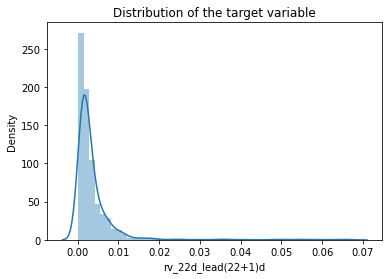

In [86]:
#plot the distribution of the target variable
import seaborn as sns
import matplotlib.pyplot as plt
sns.distplot(final_df['rv_22d_lead(22+1)d'])
plt.title('Distribution of the target variable')
plt.show()


In [101]:
#rank the top 5 variables with the highest mean
summary_stats.sort_values(by='mean', ascending=False).head(5)




,count,mean,std,skewness,kurtosis,median,min,25%,50%,75%,max
ATM_EU Emissions (ICE) 6M Vols_lag1d_100_period_std_dev_volatility,2314.0,3.553529e+18,1.664018e+19,4.515825,18.498602,0.038129,0.000000,0.000000,0.038129,0.073205,8.306747e+19
ATM_EU Emissions (ICE) 3M Vols_lag1d_100_period_std_dev_volatility,2314.0,1.301701e+18,6.097832e+18,4.516894,18.505982,0.036412,0.000000,0.000000,0.036412,0.097377,3.044025e+19
ATM_EU Emissions (ICE) 6M Vols_lag1d,2314.0,7.011651e+17,1.724853e+19,29.874190,941.727514,0.280539,0.067311,0.203058,0.280539,0.360589,5.703230e+20
ATM_EU Emissions (ICE) 2M Vols_lag1d_100_period_std_dev_volatility,2314.0,5.683971e+17,2.664995e+18,4.519282,18.522875,0.034561,0.000000,0.000000,0.034561,0.115566,1.330336e+19
ATM_EU Emissions (ICE) 3M Vols_lag1d,2314.0,2.557506e+17,6.319627e+18,30.007739,948.535577,0.281215,0.062231,0.207612,0.281215,0.396951,2.059500e+20


<AxesSubplot:>

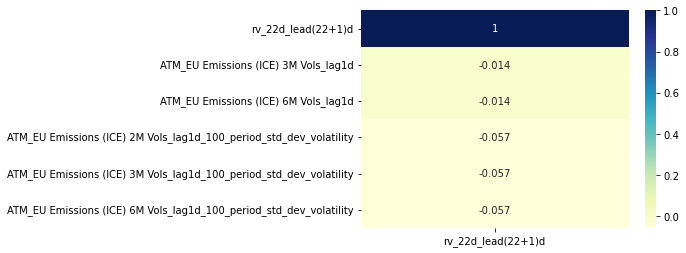

In [134]:
#correaltion b/w varibles with highest mean and target variable
corr_mean = final_df[['ATM_EU Emissions (ICE) 6M Vols_lag1d_100_period_std_dev_volatility', 'ATM_EU Emissions (ICE) 3M Vols_lag1d_100_period_std_dev_volatility', 'ATM_EU Emissions (ICE) 6M Vols_lag1d', 'ATM_EU Emissions (ICE) 2M Vols_lag1d_100_period_std_dev_volatility', 'ATM_EU Emissions (ICE) 3M Vols_lag1d', 'rv_22d_lead(22+1)d']].corr()[['rv_22d_lead(22+1)d']].sort_values(by='rv_22d_lead(22+1)d', ascending=False)
corr_mean

#create a heatmap of corr_mean 
sns.heatmap(corr_mean, annot=True, cmap='YlGnBu')

In [93]:
#rank the top 5 variables with the highest sd
summary_stats.sort_values(by='std', ascending=False).head(5)

,count,mean,std,skewness,kurtosis,median,min,25%,50%,75%,max
ATM_EU Emissions (ICE) 6M Vols_lag1d,2314.0,7.011651e+17,1.724853e+19,29.874190,941.727514,0.280539,0.067311,0.203058,0.280539,0.360589,5.703230e+20
ATM_EU Emissions (ICE) 6M Vols_lag1d_100_period_std_dev_volatility,2314.0,3.553529e+18,1.664018e+19,4.515825,18.498602,0.038129,0.000000,0.000000,0.038129,0.073205,8.306747e+19
ATM_EU Emissions (ICE) 3M Vols_lag1d,2314.0,2.557506e+17,6.319627e+18,30.007739,948.535577,0.281215,0.062231,0.207612,0.281215,0.396951,2.059500e+20
ATM_EU Emissions (ICE) 3M Vols_lag1d_100_period_std_dev_volatility,2314.0,1.301701e+18,6.097832e+18,4.516894,18.505982,0.036412,0.000000,0.000000,0.036412,0.097377,3.044025e+19
ATM_EU Emissions (ICE) 2M Vols_lag1d,2314.0,1.105049e+17,2.760734e+18,30.338584,967.636532,0.286276,0.058969,0.208312,0.286276,0.409609,9.218320e+19


<AxesSubplot:>

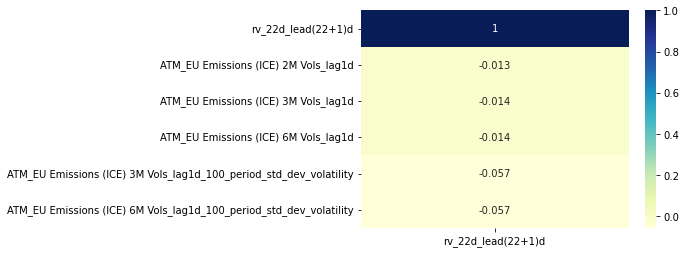

In [133]:
#correaltion b/w varibles with highest sd and target variable
corr_sd = final_df[['ATM_EU Emissions (ICE) 6M Vols_lag1d', 'ATM_EU Emissions (ICE) 6M Vols_lag1d_100_period_std_dev_volatility', 'ATM_EU Emissions (ICE) 3M Vols_lag1d', 'ATM_EU Emissions (ICE) 3M Vols_lag1d_100_period_std_dev_volatility', 'ATM_EU Emissions (ICE) 2M Vols_lag1d', 'rv_22d_lead(22+1)d']].corr()[['rv_22d_lead(22+1)d']].sort_values(by='rv_22d_lead(22+1)d', ascending=False)
corr_sd

sns.heatmap(corr_sd, annot=True, cmap='YlGnBu')

In [130]:
#rank the top 5 variables with the highest skewness
summary_stats.sort_values(by='skewness', ascending=False).head(5)

,count,mean,std,skewness,kurtosis,median,min,25%,50%,75%,max
ATM_AUD (CME) 1W Vols_lag1d,2771.0,1.503992e-02,1.076247e-01,52.005183,2726.313708,0.010308,0.001683,0.007216,0.010308,0.016077,5.655445e+00
ATM_Soybean Meal (CBT) 1W Vols_lag1d,2771.0,6.726161e-02,2.390318e-01,49.475678,2544.045303,0.054859,0.009666,0.037252,0.054859,0.077549,1.237908e+01
ATM_WTI Crude (NYM) 1W Vols_lag1d,2157.0,2.250455e-01,1.405013e+00,31.865103,1216.840370,0.096314,0.014799,0.057140,0.096314,0.163378,5.652526e+01
ATM_WTI Crude Oil (NYM) 1M Vols_lag1d,2157.0,1.791109e-01,8.275573e-01,30.442300,1139.467083,0.096648,0.016322,0.058772,0.096648,0.154106,3.280139e+01
ATM_EU Emissions (ICE) 2M Vols_lag1d,2314.0,1.105049e+17,2.760734e+18,30.338584,967.636532,0.286276,0.058969,0.208312,0.286276,0.409609,9.218320e+19


<AxesSubplot:>

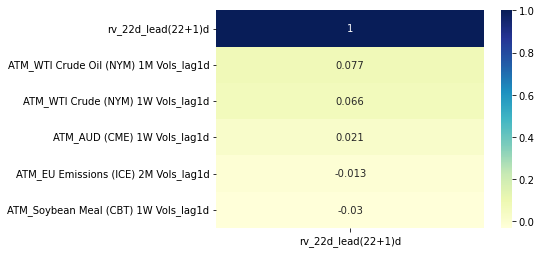

In [132]:
#corr matrix b/w most skewed variables and target variable

corr_skw = final_df[['ATM_AUD (CME) 1W Vols_lag1d', 'ATM_Soybean Meal (CBT) 1W Vols_lag1d', 'ATM_WTI Crude (NYM) 1W Vols_lag1d', 'ATM_WTI Crude Oil (NYM) 1M Vols_lag1d', 'ATM_EU Emissions (ICE) 2M Vols_lag1d', 'rv_22d_lead(22+1)d']].corr()[['rv_22d_lead(22+1)d']].sort_values(by='rv_22d_lead(22+1)d', ascending=False)
corr_skw

sns.heatmap(corr_skw, annot=True, cmap='YlGnBu')

/Users/adityadhanotia/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


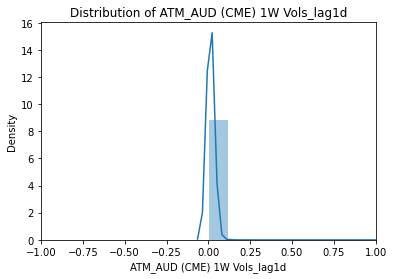

/Users/adityadhanotia/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


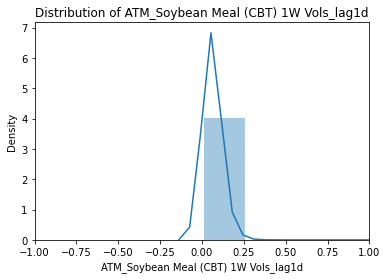

/Users/adityadhanotia/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


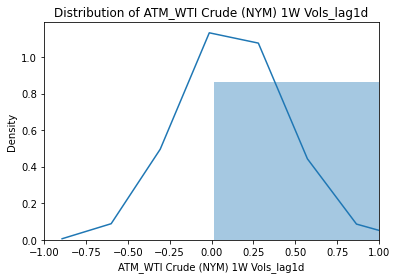

/Users/adityadhanotia/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


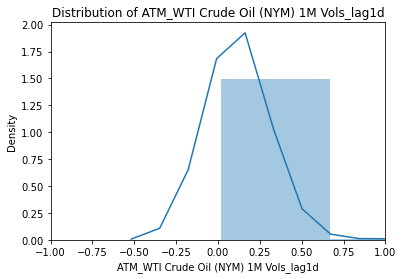

/Users/adityadhanotia/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


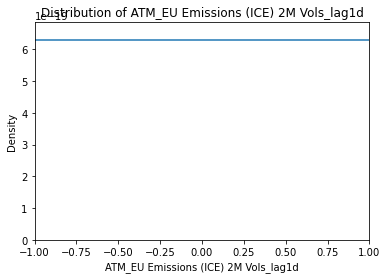

In [144]:
# see the distributions of the most skewed variables

most_skewed_var = final_df[['ATM_AUD (CME) 1W Vols_lag1d', 'ATM_Soybean Meal (CBT) 1W Vols_lag1d', 'ATM_WTI Crude (NYM) 1W Vols_lag1d', 'ATM_WTI Crude Oil (NYM) 1M Vols_lag1d', 'ATM_EU Emissions (ICE) 2M Vols_lag1d']]
most_skewed_var


for col in most_skewed_var.columns:
    sns.distplot(most_skewed_var[col])
    plt.xlim(-1, 1)
    plt.title('Distribution of ' + col)
    plt.show()

In [135]:
#rank the top 5 variables with the highest kurtosis
summary_stats.sort_values(by='kurtosis', ascending=False).head(5)

,count,mean,std,skewness,kurtosis,median,min,25%,50%,75%,max
ATM_AUD (CME) 1W Vols_lag1d,2771.0,0.015040,0.107625,52.005183,2726.313708,0.010308,0.001683,0.007216,0.010308,0.016077,5.655445
ATM_Soybean Meal (CBT) 1W Vols_lag1d,2771.0,0.067262,0.239032,49.475678,2544.045303,0.054859,0.009666,0.037252,0.054859,0.077549,12.379082
Futures_CL_CLOSE_lag1d_1_period_ret,4159.0,-0.000452,0.057986,-37.713174,1918.746897,0.000887,-3.059661,-0.011987,0.000887,0.012437,0.376623
ATM_WTI Crude (NYM) 1W Vols_lag1d,2157.0,0.225046,1.405013,31.865103,1216.840370,0.096314,0.014799,0.057140,0.096314,0.163378,56.525256
ATM_WTI Crude Oil (NYM) 1M Vols_lag1d,2157.0,0.179111,0.827557,30.442300,1139.467083,0.096648,0.016322,0.058772,0.096648,0.154106,32.801393


<AxesSubplot:>

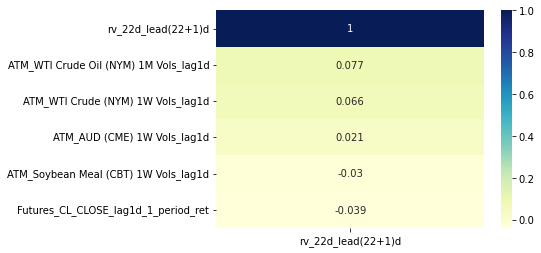

In [136]:
#corr matrix b/w most kurtosis variables and target variable

corr_kt = final_df[['ATM_AUD (CME) 1W Vols_lag1d', 'ATM_Soybean Meal (CBT) 1W Vols_lag1d', 'Futures_CL_CLOSE_lag1d_1_period_ret', 'ATM_WTI Crude (NYM) 1W Vols_lag1d', 'ATM_WTI Crude Oil (NYM) 1M Vols_lag1d', 'rv_22d_lead(22+1)d']].corr()[['rv_22d_lead(22+1)d']].sort_values(by='rv_22d_lead(22+1)d', ascending=False)
corr_kt

sns.heatmap(corr_kt, annot=True, cmap='YlGnBu')

/Users/adityadhanotia/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


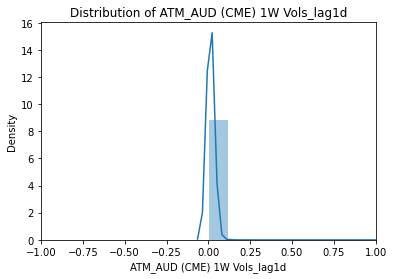

/Users/adityadhanotia/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


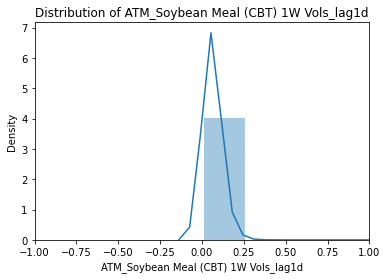

/Users/adityadhanotia/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


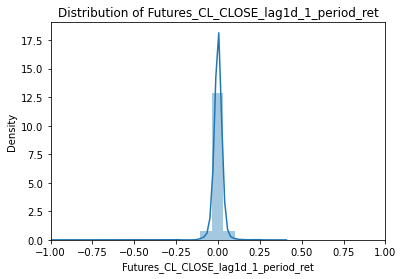

/Users/adityadhanotia/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


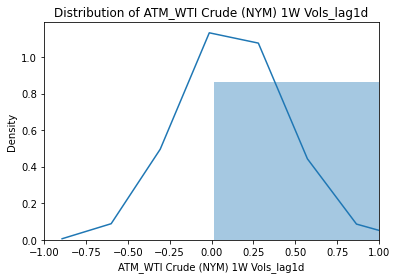

/Users/adityadhanotia/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


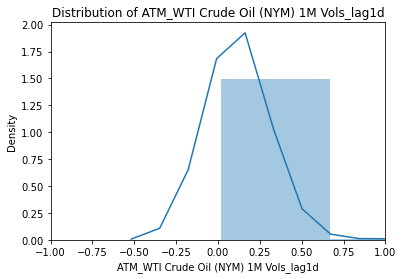

In [143]:
# see the distributions of the most kurtosis variables

most_kurtosis_var = final_df[['ATM_AUD (CME) 1W Vols_lag1d', 'ATM_Soybean Meal (CBT) 1W Vols_lag1d', 'Futures_CL_CLOSE_lag1d_1_period_ret', 'ATM_WTI Crude (NYM) 1W Vols_lag1d', 'ATM_WTI Crude Oil (NYM) 1M Vols_lag1d']]
most_kurtosis_var


for col in most_kurtosis_var.columns:
    sns.distplot(most_kurtosis_var[col])
    plt.xlim(-1, 1)
    plt.title('Distribution of ' + col)
    plt.show()

In [147]:
#rank top 5 variables with the highest cv 
summary_stats.sort_values(by='cv', ascending=False).head(5)

,count,mean,std,skewness,kurtosis,median,cv,min,25%,50%,75%,max
Equities_XLV_CLOSE_lag1d_1_period_ret_rel_to_SPY,4160.0,5.982546e-07,0.006817,-0.158874,7.869425,0.000042,11394.127348,-0.053847,-0.003218,0.000042,0.003530,0.055988
Futures_JPYUSD_CLOSE_lag1d_1_period_ret,4159.0,8.736314e-06,0.006130,0.317406,5.358029,0.000000,701.711267,-0.039289,-0.003332,0.000000,0.003090,0.053277
Futures_AUDUSD_CLOSE_lag1d_1_period_ret,4159.0,1.338393e-05,0.008103,-0.643715,10.531036,0.000250,605.439303,-0.095028,-0.003900,0.000250,0.004195,0.062122
Equities_LQD_CLOSE_lag1d_1_period_ret,4160.0,5.993338e-05,0.005378,0.065373,75.744149,0.000286,89.729200,-0.091111,-0.002071,0.000286,0.002299,0.097677
Futures_TY_CLOSE_lag1d_1_period_ret,4155.0,4.454245e-05,0.003587,-0.037673,5.686239,0.000118,80.537675,-0.025925,-0.001906,0.000118,0.002010,0.036002


<AxesSubplot:>

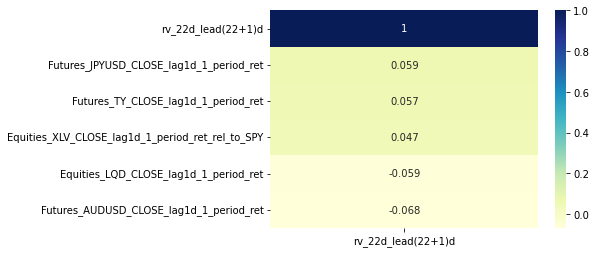

In [149]:
#corr matrix b/w most cv variables and target variable

corr_cv = final_df[['Equities_XLV_CLOSE_lag1d_1_period_ret_rel_to_SPY', 'Futures_JPYUSD_CLOSE_lag1d_1_period_ret', 'Futures_AUDUSD_CLOSE_lag1d_1_period_ret', 'Equities_LQD_CLOSE_lag1d_1_period_ret', 'Futures_TY_CLOSE_lag1d_1_period_ret', 'rv_22d_lead(22+1)d']].corr()[['rv_22d_lead(22+1)d']].sort_values(by='rv_22d_lead(22+1)d', ascending=False)
corr_cv

sns.heatmap(corr_cv, annot=True, cmap='YlGnBu')

/Users/adityadhanotia/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


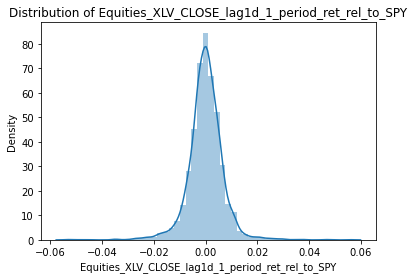

/Users/adityadhanotia/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


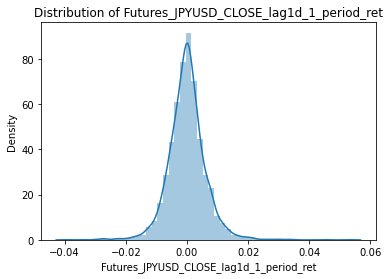

/Users/adityadhanotia/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


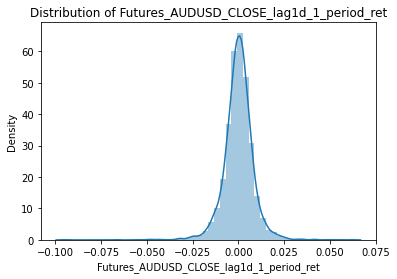

/Users/adityadhanotia/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


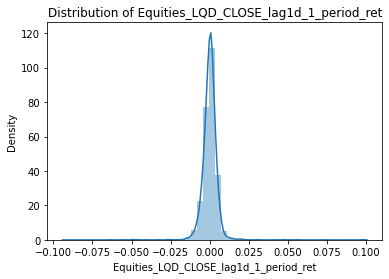

/Users/adityadhanotia/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


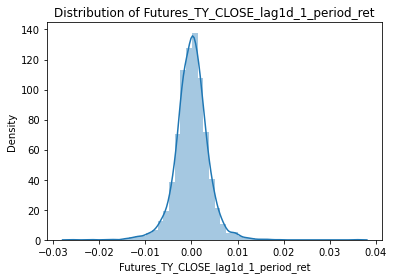

In [151]:
# see the distributions of the most cv variables

most_cv_var = final_df[['Equities_XLV_CLOSE_lag1d_1_period_ret_rel_to_SPY', 'Futures_JPYUSD_CLOSE_lag1d_1_period_ret', 'Futures_AUDUSD_CLOSE_lag1d_1_period_ret', 'Equities_LQD_CLOSE_lag1d_1_period_ret', 'Futures_TY_CLOSE_lag1d_1_period_ret']]
most_cv_var


for col in most_cv_var.columns:
    sns.distplot(most_cv_var[col])
    # plt.xlim(-1, 1)
    plt.title('Distribution of ' + col)
    plt.show()